Нужно реализовать простейшую семантическую поисковую систему помощью векторного представления предложений/текстов.
1. Выбрать коллекцию текстовых документов (небольшое подмножество статей из Википедии (из дампа), новости, и т.п.).
2. Выбрать модель для получения векторных представлений (например [sentence-transformers](https://huggingface.co/sentence-transformers)).
3. Выбрать векторное хранилище (faiss, lancedb, qdrant, chroma, pgvector, redis и т.д.)
4. Реализовать поиск, (возможно с постфильтрацией) и продемонстрировать его работу. Индексация и поиск должны быть реализованы в виде отдельных скриптов с CLI.

Нельзя использовать LangChain. 

In [1]:
import gzip

from dataclasses import dataclass
from typing import Iterator
from search import FaissVectorStorage 

@dataclass
class Text:
    label: str
    title: str
    text: str
    
file_path = "D://Nlp'23//nlp-2023//data//news.txt.gz"

def read_texts(fn: str) -> Iterator[Text]:
    with gzip.open(fn, "rt", encoding="utf-8") as f:
        for line in f:
            yield Text(*line.strip().split("\t"))

texts = list(read_texts(file_path))


c:\Users\Alyonka\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
query = 'команда хоккей питер'
query_embedding = model.encode(query) 
query_embedding

array([-6.36143759e-02,  1.17178991e-01, -3.03596437e-01, -4.41780359e-01,
       -1.01819187e-02,  1.91802099e-01,  4.97070141e-02,  7.41297379e-02,
        3.59749764e-01,  1.40170455e-01, -1.15748592e-01, -1.86516643e-01,
        1.99802116e-01,  1.40457109e-01, -1.64564982e-01, -6.89451471e-02,
       -2.34800726e-01,  3.75166148e-01,  1.19583882e-01, -8.22875947e-02,
       -2.07929224e-01, -3.93173486e-01, -7.28523210e-02, -3.11363488e-01,
        4.33062345e-01,  1.00745037e-01,  1.56459883e-01,  1.14911675e-01,
        2.82146960e-01,  2.71129999e-02, -1.99931115e-01, -1.59822389e-01,
        3.98698300e-01,  2.51056522e-01,  1.38006359e-03,  3.83664101e-01,
       -1.76387057e-01,  2.14589342e-01, -2.04348564e-02,  1.04944192e-01,
        3.53112429e-01,  8.69586319e-02,  3.06885988e-02,  1.61630616e-01,
       -9.79152992e-02,  3.10645103e-01, -5.21302760e-01, -1.26788095e-01,
       -5.80865368e-02,  1.25188515e-01, -9.22603011e-02, -1.95956022e-01,
       -4.27036472e-02, -

In [5]:
index_path = "D:\\Nlp'23\\nlp-2023\\tasks\\task 3\\data\\multilingual-MiniLM-L12-v2_index.index"
vector_storage = FaissVectorStorage(dimension=model.get_sentence_embedding_dimension())
vector_storage.load_index(index_path)

search_results = vector_storage.search(query_embedding, k=5)

In [7]:
for result_index in search_results:
    print(result_index)
    print(texts[result_index].text)
    print()
  

8329
Питерский хоккейный СКА на своем официальном сайте подтвердил информацию о том, что во время локаута в НХЛ цвета клуба будет защищать форвард сборной России и "Нью-Джерси Девилс" Илья Ковальчук.29-летний Ковальчук подпишет контракт с питерцами 18 сентября, тогда же состоится специальная пресс-конференция, посвященная этому событию. Дебют россиянина в новой команде может состояться 23 сентября, когда СКА в гостях сыграет с обладателем Кубка Гагарина московским "Динамо".В сезоне-2011/12 Ковальчук вместе с "Нью-Джерси" дошел до финала Кубка Стэнли, где команда уступила "Лос-Анджелес Кингс". На счету россиянина 83 очка (37 голов и 46 передач) в 77 играх регулярного чемпионата НХЛ, а также 19 очков (восемь голов и 11 передач) в 23 матчах плей-офф.Во время локаута в НХЛ в сезоне-2004/05 Ковальчук также выступал в России, но тогда нападающий подписал контракт с казанским "Ак Барсом".В 2001-2004 и 2005-2010 годах Ковальчук выступал в составе "Атланта Трэшерс", затем россиянин подписал 15-

Ниже представлен топ 3 поиск по запросу "команда хоккей питер"

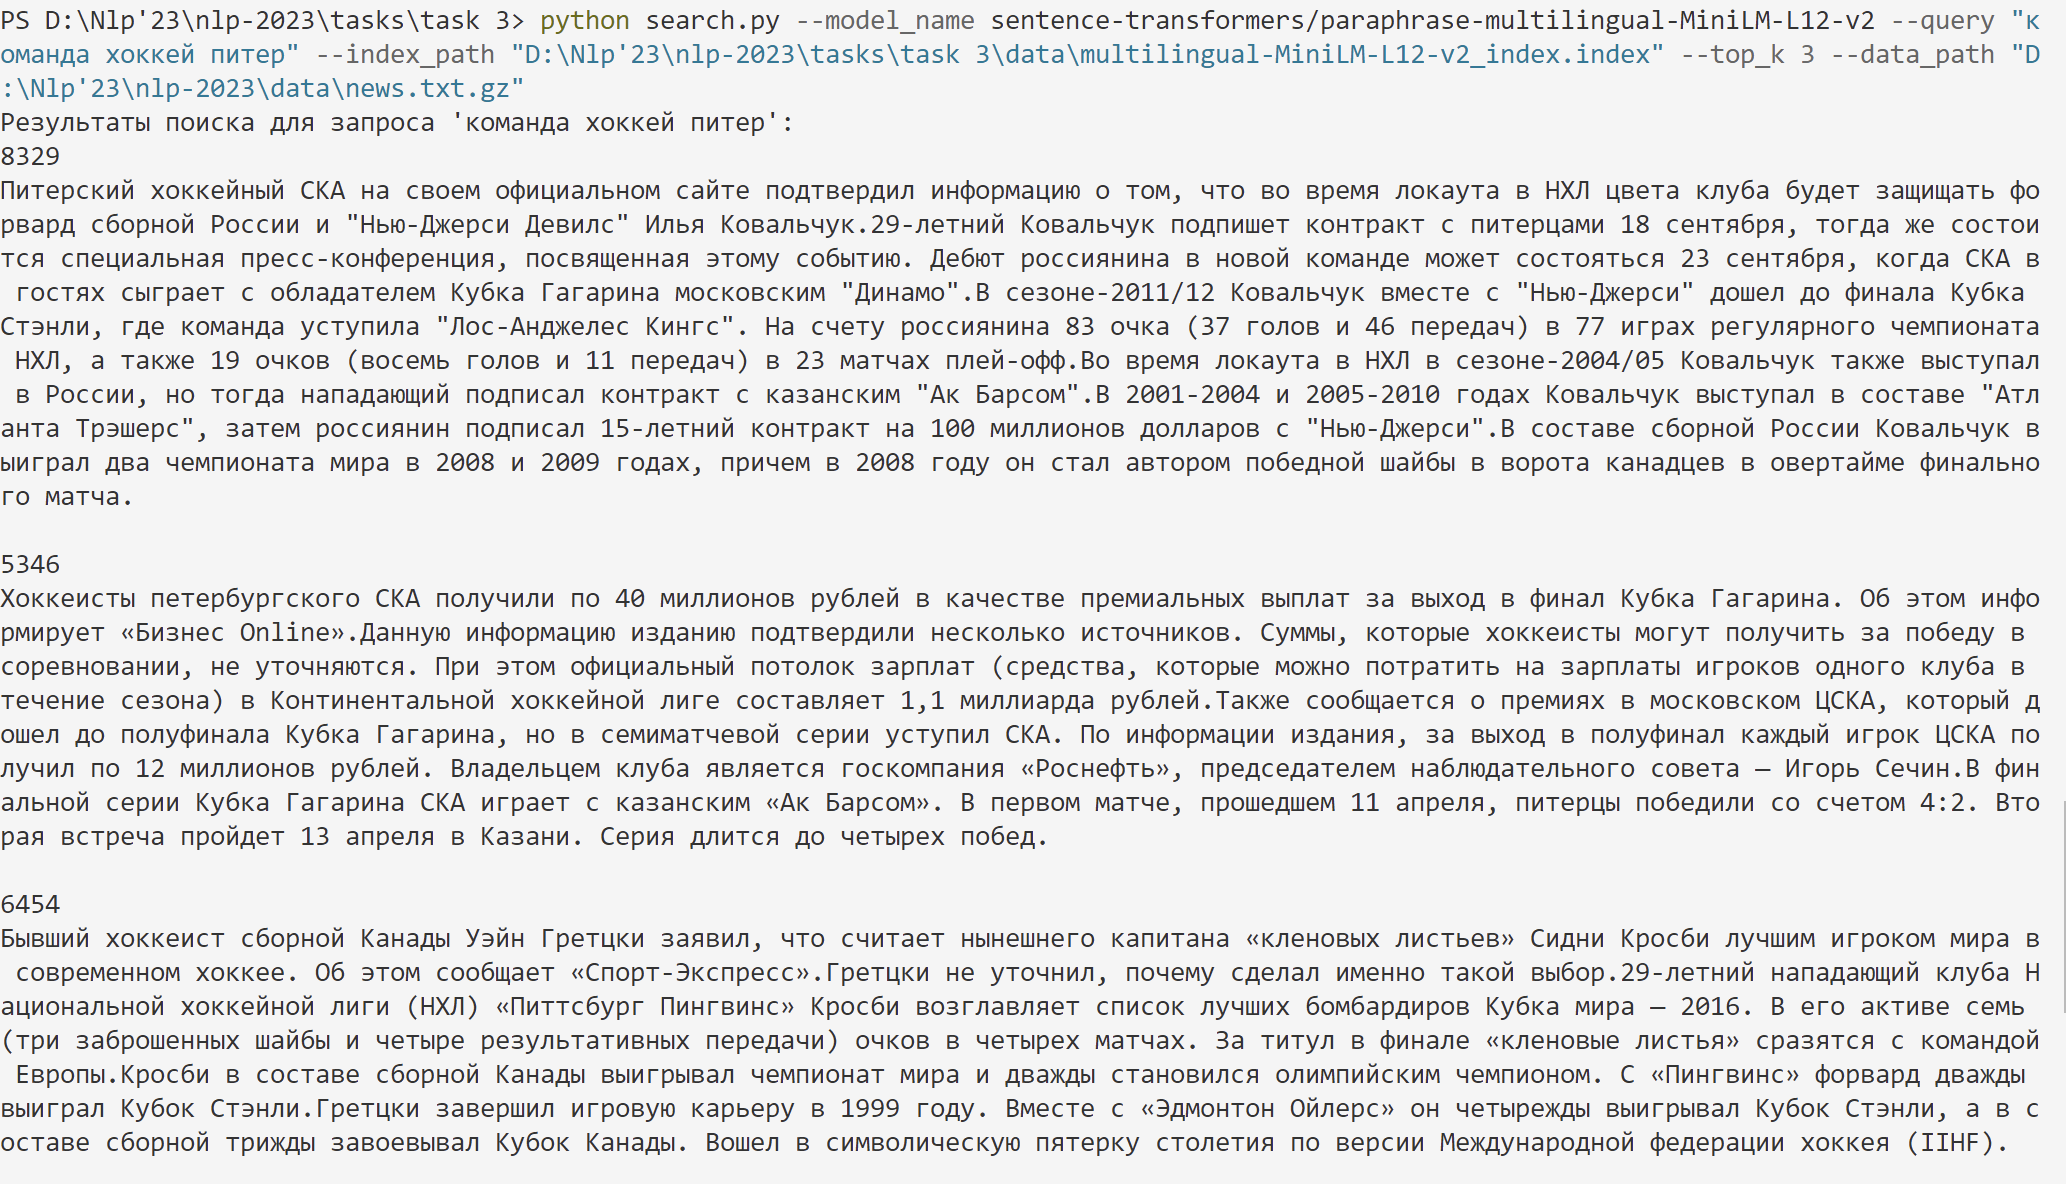